This notebook documents:
- dataset source files used in this thesis repo
- basic schema + missingness
- class imbalance
- key distributions and simple sanity checks

Figures are saved to: `docs/figures/data/00_data_overview/`


In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

# 🔧 Set this to your actual repo root (the folder that contains api/, data/, docs/, etc.)
REPO_ROOT = Path("/Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection").resolve()

os.chdir(REPO_ROOT)  # makes relative paths work
print("CWD:", Path.cwd())

RAW_PATH = REPO_ROOT / "data/raw/creditcard.csv"
ENRICHED_CSV = REPO_ROOT / "data/processed/enriched.csv"
ENRICHED_SAMPLE = REPO_ROOT / "data/processed/enriched_sample.csv"
FIG_DIR = REPO_ROOT / "docs/figures/data/00_data_overview"
FIG_DIR.mkdir(parents=True, exist_ok=True)

print("RAW_PATH:", RAW_PATH, "exists=", RAW_PATH.exists())
print("ENRICHED_CSV:", ENRICHED_CSV, "exists=", ENRICHED_CSV.exists())
print("ENRICHED_SAMPLE:", ENRICHED_SAMPLE, "exists=", ENRICHED_SAMPLE.exists())
print("FIG_DIR:", FIG_DIR)



CWD: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection
RAW_PATH: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/data/raw/creditcard.csv exists= True
ENRICHED_CSV: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/data/processed/enriched.csv exists= True
ENRICHED_SAMPLE: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/data/processed/enriched_sample.csv exists= True
FIG_DIR: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/docs/figures/data/00_data_overview


In [9]:
def load_dataset():
    # Priority: enriched.csv -> enriched_sample.csv -> raw creditcard.csv
    if ENRICHED_CSV.exists():
        df = pd.read_csv(ENRICHED_CSV)
        source = str(ENRICHED_CSV)
    elif ENRICHED_SAMPLE.exists():
        df = pd.read_csv(ENRICHED_SAMPLE)
        source = str(ENRICHED_SAMPLE)
    elif RAW_PATH.exists():
        df = pd.read_csv(RAW_PATH)
        source = str(RAW_PATH)
    else:
        raise FileNotFoundError("No dataset found. Expected one of enriched.csv / enriched_sample.csv / creditcard.csv")

    return df, source

df, source = load_dataset()
print("Loaded from:", source)
print("Shape:", df.shape)
df.head()


Loaded from: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/data/processed/enriched.csv
Shape: (284807, 52)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,device_id,device_os,browser,is_new_device,ip_country,is_proxy_vpn,ip_reputation,txn_count_5m,txn_count_30m,txn_count_60m,avg_amount_7d,account_age_days,token_age_days,avg_spend_user_30d,billing_country,shipping_country,geo_distance_km,country_mismatch,amount_zscore,night_txn,weekend_txn
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,dev_12345,Android,Firefox,False,SE,False,0.512,1,1,1,149.62,112,352,17.88,SE,FR,1882.9,True,1.0,True,True
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,dev_12345,MacOS,Chrome,False,IT,True,0.757,2,2,2,76.16,421,115,4.38,ES,CA,7059.7,True,-1.0,True,True
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,dev_1527590,Windows,Safari,False,FR,True,0.351,1,1,1,378.66,322,13,6.39,GB,PL,1529.7,True,1.0,True,True
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,dev_1527590,iOS,Chrome,False,NL,False,0.538,2,2,2,251.08,954,365,5.78,NL,IN,7110.4,True,-1.0,True,True
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,dev_1042835,iOS,Edge,False,SE,False,0.257,1,1,1,69.99,255,52,155.01,AU,US,15184.5,True,1.0,True,True


In [12]:
# Try to resolve label column
label_candidates = ["Class", "label", "fraud", "is_fraud"]
label_col = next((c for c in label_candidates if c in df.columns), None)

print("Columns:", len(df.columns))
print("Label column detected:", label_col)

df.info()


Columns: 52
Label column detected: Class
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 52 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time                284807 non-null  float64
 1   V1                  284807 non-null  float64
 2   V2                  284807 non-null  float64
 3   V3                  284807 non-null  float64
 4   V4                  284807 non-null  float64
 5   V5                  284807 non-null  float64
 6   V6                  284807 non-null  float64
 7   V7                  284807 non-null  float64
 8   V8                  284807 non-null  float64
 9   V9                  284807 non-null  float64
 10  V10                 284807 non-null  float64
 11  V11                 284807 non-null  float64
 12  V12                 284807 non-null  float64
 13  V13                 284807 non-null  float64
 14  V14                 284807 non-null  float6

In [13]:
missing = df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing columns count:", missing.shape[0])
missing.head(30)


Missing columns count: 0


Series([], dtype: int64)

,count,fraction
Class,,
0,284315,0.998273
1,492,0.001727


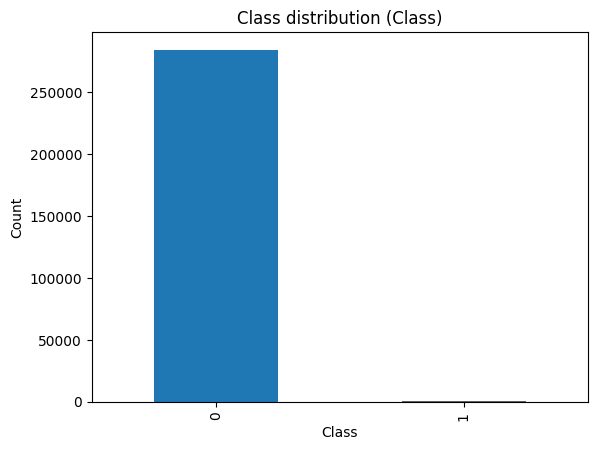

Saved: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/docs/figures/data/00_data_overview/class_distribution.png


In [14]:
if label_col is None:
    print("No label column found; skipping class imbalance section.")
else:
    vc = df[label_col].value_counts(dropna=False).sort_index()
    frac = (vc / vc.sum()).rename("fraction")
    summary = pd.concat([vc.rename("count"), frac], axis=1)
    display(summary)

    # Plot
    plt.figure()
    summary["count"].plot(kind="bar")
    plt.title(f"Class distribution ({label_col})")
    plt.xlabel(label_col)
    plt.ylabel("Count")
    out = FIG_DIR / "class_distribution.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)


In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", len(num_cols))

df[num_cols].describe().T.head(30)


Numeric columns: 41


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.159194e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.353041e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.376343e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.106827e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.979288e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.506473e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.588401e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.220467e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.419329e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Amount column detected: Amount


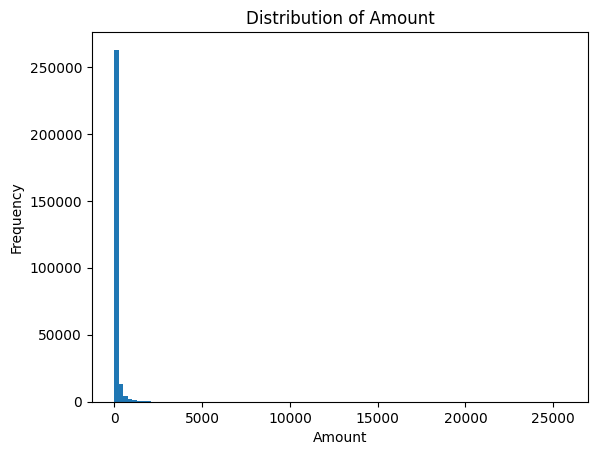

Saved: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/docs/figures/data/00_data_overview/dist_Amount.png


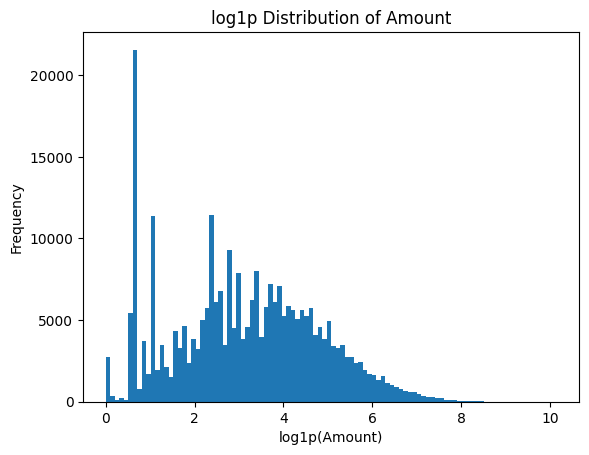

Saved: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/docs/figures/data/00_data_overview/dist_Amount_log1p.png


In [16]:
amount_candidates = ["Amount", "amount", "num__Amount"]
amount_col = next((c for c in amount_candidates if c in df.columns), None)
print("Amount column detected:", amount_col)

if amount_col is None:
    print("No amount-like column found; skipping.")
else:
    s = pd.to_numeric(df[amount_col], errors="coerce")
    s = s.dropna()

    plt.figure()
    plt.hist(s, bins=100)
    plt.title(f"Distribution of {amount_col}")
    plt.xlabel(amount_col)
    plt.ylabel("Frequency")
    out = FIG_DIR / f"dist_{amount_col}.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)

    # log-scale
    plt.figure()
    plt.hist(np.log1p(s), bins=100)
    plt.title(f"log1p Distribution of {amount_col}")
    plt.xlabel(f"log1p({amount_col})")
    plt.ylabel("Frequency")
    out = FIG_DIR / f"dist_{amount_col}_log1p.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)


Time column detected: Time


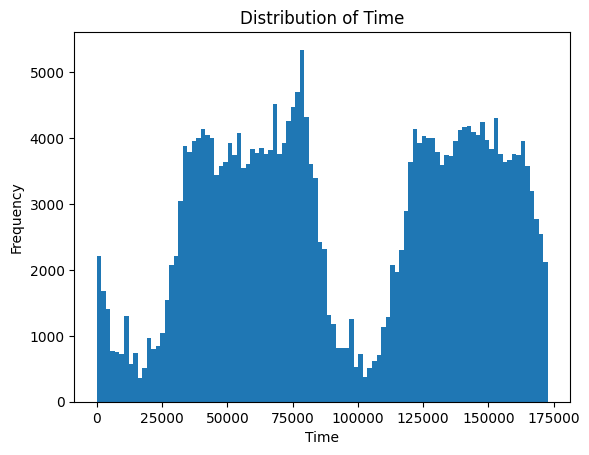

Saved: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/docs/figures/data/00_data_overview/dist_Time.png


In [17]:
time_candidates = ["Time", "timestamp", "created", "event_time"]
time_col = next((c for c in time_candidates if c in df.columns), None)
print("Time column detected:", time_col)

if time_col is None:
    print("No time-like column found; skipping.")
else:
    # Attempt parsing
    s = df[time_col]

    # If numeric 'Time' from creditcard.csv (seconds since first txn)
    if np.issubdtype(s.dtype, np.number):
        plt.figure()
        plt.hist(s.dropna().values, bins=100)
        plt.title(f"Distribution of {time_col}")
        plt.xlabel(time_col)
        plt.ylabel("Frequency")
        out = FIG_DIR / f"dist_{time_col}.png"
        plt.savefig(out, dpi=200, bbox_inches="tight")
        plt.show()
        print("Saved:", out)
    else:
        # parse datetime if string-like
        dt = pd.to_datetime(s, errors="coerce", utc=True)
        print("Parsed datetimes (non-null):", dt.notna().sum())
        if dt.notna().sum() > 0:
            plt.figure()
            plt.hist(dt.dropna().astype("int64") // 10**9, bins=100)
            plt.title(f"Distribution of {time_col} (epoch seconds)")
            plt.xlabel("epoch seconds")
            plt.ylabel("Frequency")
            out = FIG_DIR / f"dist_{time_col}_epoch.png"
            plt.savefig(out, dpi=200, bbox_inches="tight")
            plt.show()
            print("Saved:", out)


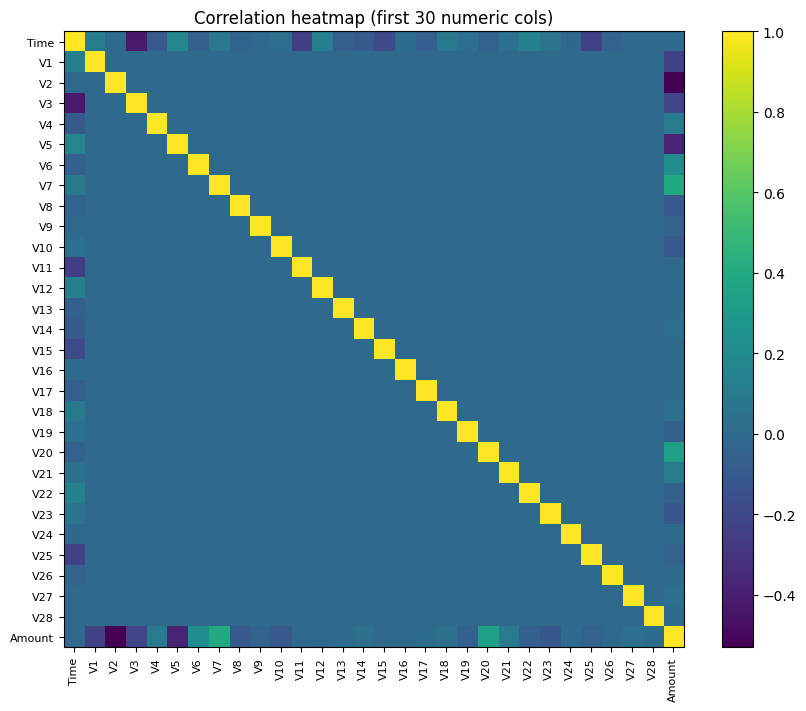

Saved: /Users/lavanyasrinivas/Documents/AI-First-Preauth-Fraud-Detection/AI-First-Preauth-Fraud-Detection/docs/figures/data/00_data_overview/corr_heatmap_first30.png


In [18]:
# Correlation can be expensive on wide tables; cap to first N numeric columns
N = 30
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(num_cols) == 0:
    print("No numeric columns; skipping correlation.")
else:
    cols = num_cols[:N]
    corr = df[cols].corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    plt.imshow(corr.values, aspect="auto")
    plt.title(f"Correlation heatmap (first {len(cols)} numeric cols)")
    plt.xticks(range(len(cols)), cols, rotation=90, fontsize=8)
    plt.yticks(range(len(cols)), cols, fontsize=8)
    plt.colorbar()
    out = FIG_DIR / "corr_heatmap_first30.png"
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out)
